<a href="https://colab.research.google.com/github/deepavasanthkumar/spark_delta_lake/blob/main/Combining_Dask_with_Delta_Lake_and_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dask[complete] pyspark==3.5.0 delta-spark==3.0.0 matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=91883740500773e8c6a6c1fe0432b87c057a81edabd30039f5b9732e1ba8cfac
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.1
    Uninstalling pyspark-3.5.1:
      Successfully uninstalled pyspark-3.5.1
  Attempting uninstall: delta-spark
    Found existing installation: delta-spark 3.2.0
    Uninstalling delta-spark-3.2.0:
      Successfully uninstalled delta-spark-3.2.0


In [ ]:
from pyspark.sql import SparkSession
from delta import *
import pyspark.sql

builder = SparkSession.builder.appName("Dask with Delta"
    ).config("spark.sql.extensions",
             "io.delta.sql.DeltaSparkSessionExtension"
    ).config("spark.sql.catalog.spark_catalog",
             "org.apache.spark.sql.delta.catalog.DeltaCatalog"
    ).config("spark.jars.packages", "delta-spark:3.0.0")
spark = configure_spark_with_delta_pip(builder).getOrCreate()

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from delta import *


# Create a sample Pandas DataFrame
data = pd.DataFrame({
    "id": range(1, 101),
    "value": [x * 10 for x in range(1, 101)]
})

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(data)

# Write the DataFrame to a Delta table
spark_df.write.format("delta").mode("overwrite").save("/tmp/delta-table")


In [ ]:
import dask.dataframe as dd
from dask.distributed import Client

# Start a Dask client
client = Client(n_workers=4)

# Read the Delta table using PySpark
spark_df = spark.read.format("delta").load("/tmp/delta-table")

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = spark_df.toPandas()

# Create a Dask DataFrame from the Pandas DataFrame
dask_df = dd.from_pandas(pandas_df, npartitions=4)

# Perform Dask operations
result = dask_df[dask_df['value'] > 200].compute()
print(result)


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36029
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46859'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44597'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40671'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44547'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45451', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45451
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41738
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45281', name: 0, stat

     id  value
20   21    210
21   22    220
22   23    230
23   24    240
24   25    250
..  ...    ...
95   96    960
96   97    970
97   98    980
98   99    990
99  100   1000

[80 rows x 2 columns]


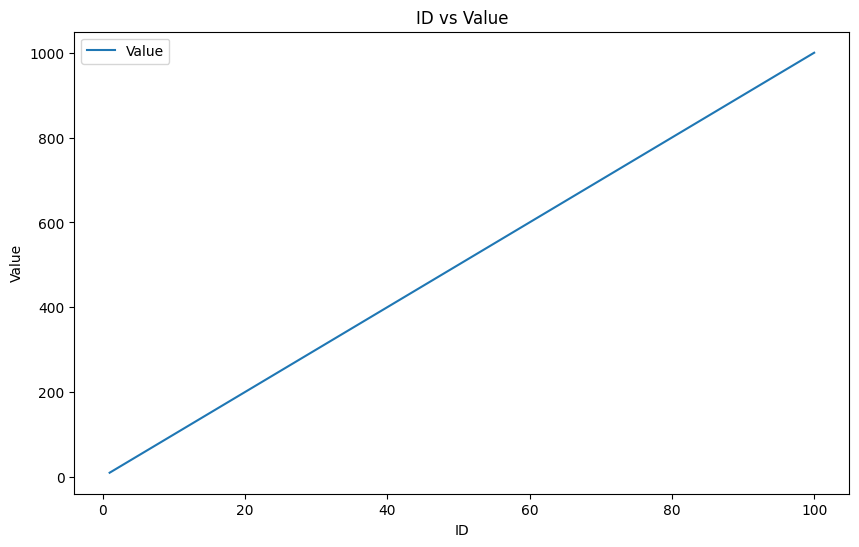

In [ ]:
import matplotlib.pyplot as plt

# Compute the Dask DataFrame to get a Pandas DataFrame
pdf = dask_df.compute()

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(pdf['id'], pdf['value'], label='Value')
plt.xlabel('ID')
plt.ylabel('Value')
plt.title('ID vs Value')
plt.legend()
plt.show()


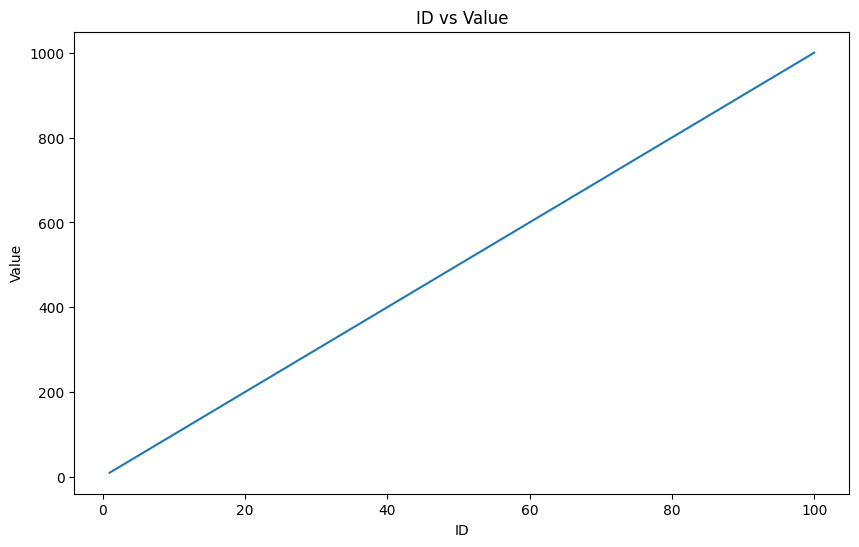

In [ ]:
import seaborn as sns

# Compute the Dask DataFrame to get a Pandas DataFrame
pdf = dask_df.compute()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='id', y='value', data=pdf)
plt.xlabel('ID')
plt.ylabel('Value')
plt.title('ID vs Value')
plt.show()


In [ ]:
!pip install deltadask[complete]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: dask
    Found existing installation: dask 2023.8.1
    Uninstalling dask-2023.8.1:
      Successfully uninstalled dask-2023.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
distributed 2023.8.1 requires dask==2023.8.1, but you have dask 2022.12.1 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incomp

In [ ]:
import deltadask
ddf = deltadask.read_delta(
    "/tmp/delta-table").compute()
ddf


,id,value
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
...,...,...
45,96,960
46,97,970
47,98,980
48,99,990


In [ ]:

import deltalake
import pandas as pd
df = pd.DataFrame({"id": [0, 1, 2]})
deltalake.writer.write_deltalake("/tmp/delta-table1", df)

In [ ]:

df = pd.DataFrame({"id": [4, 5]})
deltalake.writer.write_deltalake("/tmp/delta-table1", df, mode="append")

In [ ]:
df = pd.DataFrame({"id": [7, 8, 9]})
deltalake.writer.write_deltalake("/tmp/delta-table1", df, mode="overwrite")

In [ ]:
print(deltadask.read_delta("/tmp/delta-table1", version=1).compute())

   id
0   0
1   1
2   2
0   4
1   5


In [ ]:
deltalake.DeltaTable("/tmp/delta-table1", version=0).to_pandas()

,id
0,0
1,1
2,2
